# SDLAB ASSIGNMENT 8 - Correlation and Regression Analysis on California Housing Prices Dataset

- BY
    - Vaibhav Jaiswal
    - PRN : 17070122071
    - CS-3
    - Final Year CSE, 2017-2021 

## Objective:
- To Perform correlation and regression analysis in R

## Installing and importing packages

In [1]:
packages <- c("tidyverse","Hmisc","corrplot","ggcorrplot","caret")

install.packages(setdiff(packages, rownames(installed.packages())))  

In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(Hmisc))
suppressMessages(library(corrplot))
suppressMessages(library(ggcorrplot))

## Reading And Cleaning Dataset

In [3]:
# Reading the Dataset
data_housing <- read_csv("housing.csv")


Parsed with column specification:
cols(
  longitude = col_double(),
  latitude = col_double(),
  housing_median_age = col_double(),
  total_rooms = col_double(),
  total_bedrooms = col_double(),
  population = col_double(),
  households = col_double(),
  median_income = col_double(),
  median_house_value = col_double(),
  ocean_proximity = col_character()
)


In [4]:
# Lets check the dataset 
data_housing[1:5,]

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [5]:
# Lets see a summary of the dataset 

summary(data_housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 NA's   :5                                                          
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

### Convert ocean proximity to a factor

In [6]:
data_housing = data_housing[data_housing$ocean_proximity != "ISLAND", ]
data_housing$ocean_proximity = as.factor(data_housing$ocean_proximity)
levels(data_housing$ocean_proximity)

[1] "<1H OCEAN"  "INLAND"     "NEAR BAY"   "NEAR OCEAN"

### Null check

In [7]:
i <- 1
for(column in names(data_housing)){
    print(paste(column,"----> ",sum(is.na(data_housing[,i]))))
    i <- i+1 
}

[1] "longitude ---->  5"
[1] "latitude ---->  0"
[1] "housing_median_age ---->  0"
[1] "total_rooms ---->  0"
[1] "total_bedrooms ---->  207"
[1] "population ---->  0"
[1] "households ---->  0"
[1] "median_income ---->  0"
[1] "median_house_value ---->  0"
[1] "ocean_proximity ---->  0"


### Fill Null values in total bedrooms 

In [8]:
total_bedrooms = data_housing$total_bedrooms
sum(is.na(total_bedrooms))

[1] 207

In [9]:
bedroom_median = median(data_housing$total_bedrooms, na.rm=TRUE)
data_housing$total_bedrooms[is.na(data_housing$total_bedrooms)] = bedroom_median

### Convert Ocean_proximity from factor to numeric for correlation analysis 

In [10]:
data_housing$ocean_proximity <- as.numeric(factor(data_housing$ocean_proximity, levels = c('INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND'), exclude = NULL))

### Drop remaining NA values

In [11]:
data_housing <- drop_na(data_housing)

## Pearson Correlation Analysis

In [12]:
str(data_housing)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	20630 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : num  3 3 3 3 3 3 3 3 3 3 ...


In [13]:
pearson_corr_matrix <- rcorr(as.matrix(data_housing), type = c("pearson"))
print(pearson_corr_matrix$r)

                     longitude    latitude housing_median_age total_rooms
longitude           1.00000000 -0.92466266        -0.10815607  0.04451507
latitude           -0.92466266  1.00000000         0.01125277 -0.03613153
housing_median_age -0.10815607  0.01125277         1.00000000 -0.36128457
total_rooms         0.04451507 -0.03613153        -0.36128457  1.00000000
total_bedrooms      0.06916594 -0.06656433        -0.31911798  0.92707634
population          0.09981900 -0.10892914        -0.29620361  0.85711130
households          0.05538223 -0.07118529        -0.30289660  0.91849284
median_income      -0.01553716 -0.07967010        -0.11873001  0.19790851
median_house_value -0.04647896 -0.14367156         0.10550442  0.13432302
ocean_proximity    -0.09524570 -0.16373459         0.21103849 -0.02599857
                   total_bedrooms   population  households median_income
longitude             0.069165937  0.099819001  0.05538223  -0.015537156
latitude             -0.066564334 -0.108

In [14]:
# convert the above correlation matrix into symbol format 
symnum_plot_pearson <- symnum(pearson_corr_matrix$r, abbr.colnames = TRUE)
symnum_plot_pearson

                   ln lt h_ ttl_r ttl_b p hs md_ m__ o
longitude          1                                  
latitude           *  1                               
housing_median_age       1                            
total_rooms              .  1                         
total_bedrooms           .  *     1                   
population                  +     +     1             
households               .  *     B     * 1           
median_income                                1        
median_house_value                           ,   1    
ocean_proximity                                  .   1
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [15]:
#lets flatten this correlation matrix

flattenCorrMatrix <- function(cormat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut]
    )
}


In [16]:
print("Flattened Pearson Correlation Matrix")
flattenCorrMatrix(pearson_corr_matrix$r)

[1] "Flattened Pearson Correlation Matrix"


row,column,cor
longitude,latitude,-0.924662659
longitude,housing_median_age,-0.108156067
latitude,housing_median_age,0.011252770
longitude,total_rooms,0.044515070
latitude,total_rooms,-0.036131529
housing_median_age,total_rooms,-0.361284568
longitude,total_bedrooms,0.069165937
latitude,total_bedrooms,-0.066564334
housing_median_age,total_bedrooms,-0.319117984
total_rooms,total_bedrooms,0.927076335


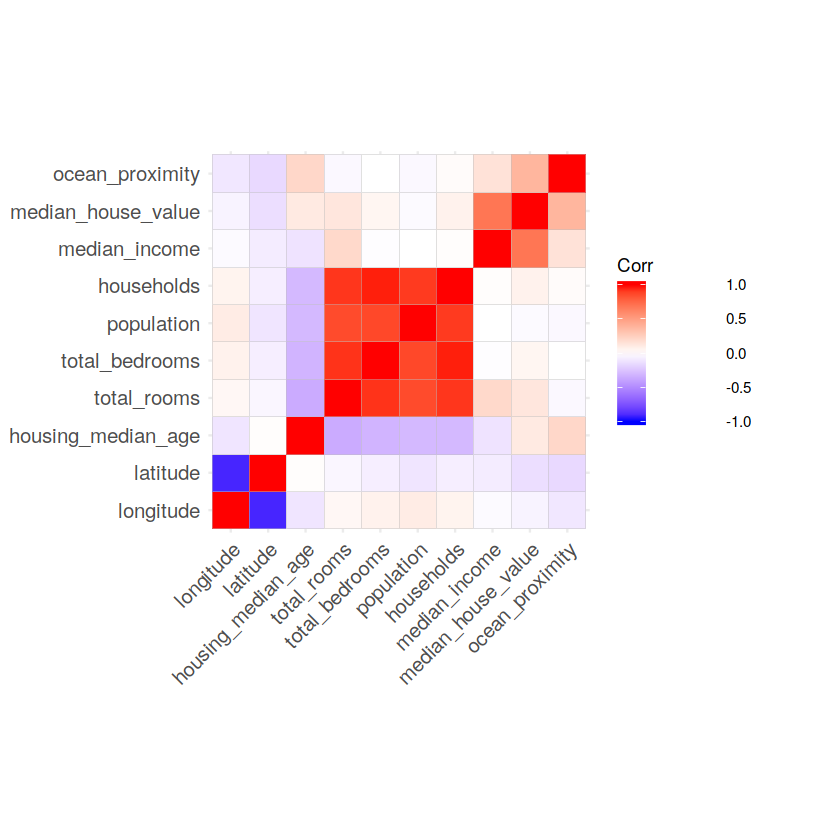

In [17]:
# Lets make a correlation plot 
ggcorrplot(pearson_corr_matrix$r)

# Spearman Rank Correlation Analysis

In [18]:
spearman_corr_matrix <- rcorr(as.matrix(data_housing), type = c("spearman"))
print(spearman_corr_matrix$r)

                     longitude    latitude housing_median_age  total_rooms
longitude           1.00000000 -0.87933780        -0.15063261  0.039997627
latitude           -0.87933780  1.00000000         0.03256937 -0.018522421
housing_median_age -0.15063261  0.03256937         1.00000000 -0.357275803
total_rooms         0.03999763 -0.01852242        -0.35727580  1.000000000
total_bedrooms      0.06364013 -0.05642849        -0.30508001  0.909435522
population          0.12354830 -0.12399671        -0.28388729  0.816144707
households          0.06014571 -0.07466685        -0.28202374  0.906814045
median_income      -0.01043589 -0.08792593        -0.14698248  0.271131009
median_house_value -0.07010337 -0.16513905         0.07484958  0.206195507
ocean_proximity    -0.10599258 -0.23875441         0.24369585  0.001579864
                   total_bedrooms   population  households median_income
longitude             0.063640127  0.123548295  0.06014571  -0.010435886
latitude             -0.05642

In [19]:
# convert the above correlation matrix into symbol format 

symnum_plot_spearman <- symnum(spearman_corr_matrix$r, abbr.colnames = TRUE)
symnum_plot_spearman

                   ln lt h_ ttl_r ttl_b p hs md_ m__ o
longitude          1                                  
latitude           +  1                               
housing_median_age       1                            
total_rooms              .  1                         
total_bedrooms           .  *     1                   
population                  +     +     1             
households                  *     B     * 1           
median_income                                1        
median_house_value                           ,   1    
ocean_proximity                                  .   1
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [20]:
print("Flattened Spearman Correlation Matrix")
flattenCorrMatrix(spearman_corr_matrix$r)

[1] "Flattened Spearman Correlation Matrix"


row,column,cor
longitude,latitude,-0.879337801
longitude,housing_median_age,-0.150632609
latitude,housing_median_age,0.032569365
longitude,total_rooms,0.039997627
latitude,total_rooms,-0.018522421
housing_median_age,total_rooms,-0.357275803
longitude,total_bedrooms,0.063640127
latitude,total_bedrooms,-0.056428490
housing_median_age,total_bedrooms,-0.305080014
total_rooms,total_bedrooms,0.909435522


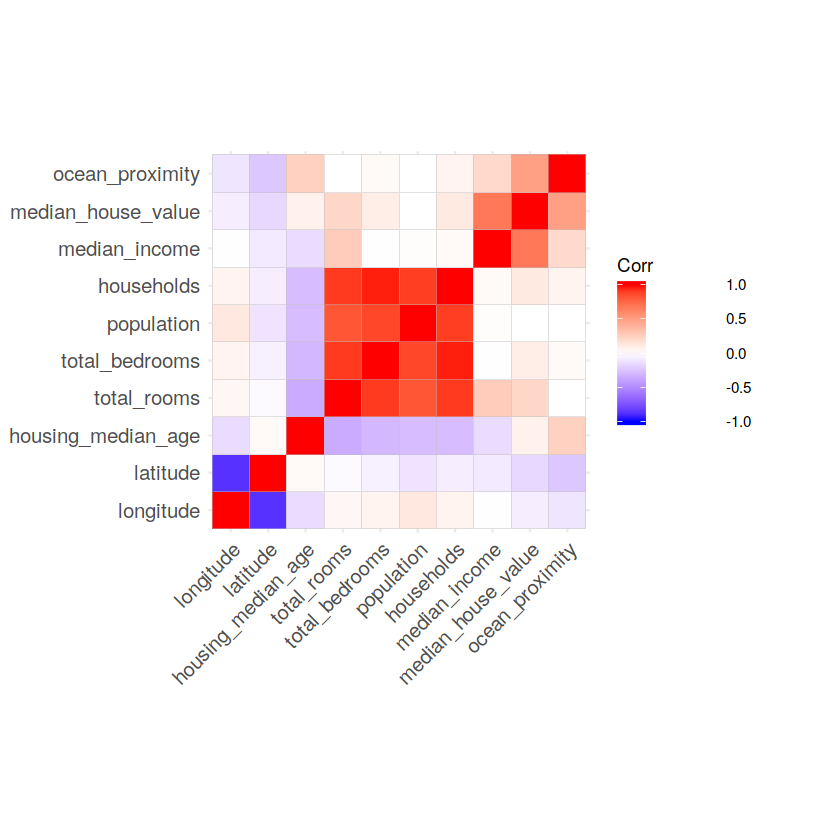

In [21]:
# Correlation plot for Spearman correlation matrix 

ggcorrplot(spearman_corr_matrix$r)

## Linear Regression

### Selecting Columns for regression

In [23]:
# to predict median_house_value  longitude latitude wont help in model
# removing longitude and latitude
data_housing = subset(data_housing , select=-c(longitude,latitude))
colnames(data_housing)


[1] "housing_median_age" "total_rooms"        "total_bedrooms"    
[4] "population"         "households"         "median_income"     
[7] "median_house_value" "ocean_proximity"

### Train Test Split

In [24]:
# splitting into train and test
set.seed(420)

train = sample(1:nrow(data_housing) , size = 0.7*nrow(data_housing))
data_train = data_housing[train,]
data_test = data_housing[-train,]
print(paste("Number of Rows in Dataset : ", nrow(data_housing)))
print(paste("Number of Rows in Train Dataset : ", nrow(data_train)))
print(paste("Number of Rows in Test Dataset : ", nrow(data_test)))

[1] "Number of Rows in Dataset :  20630"
[1] "Number of Rows in Train Dataset :  14440"
[1] "Number of Rows in Test Dataset :  6190"


### Lets make a Simple Linear Regression model

In [25]:
#lets make a linear regression model on train data

model_simple_linear_reg = lm(median_house_value~housing_median_age, data = data_train)

summary(model_simple_linear_reg)


Call:
lm(formula = median_house_value ~ housing_median_age, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-214210  -84521  -25366   57008  320007 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        178025.05    2357.27   75.52   <2e-16 ***
housing_median_age    984.31      75.29   13.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 114200 on 14438 degrees of freedom
Multiple R-squared:  0.0117,	Adjusted R-squared:  0.01163 
F-statistic: 170.9 on 1 and 14438 DF,  p-value: < 2.2e-16


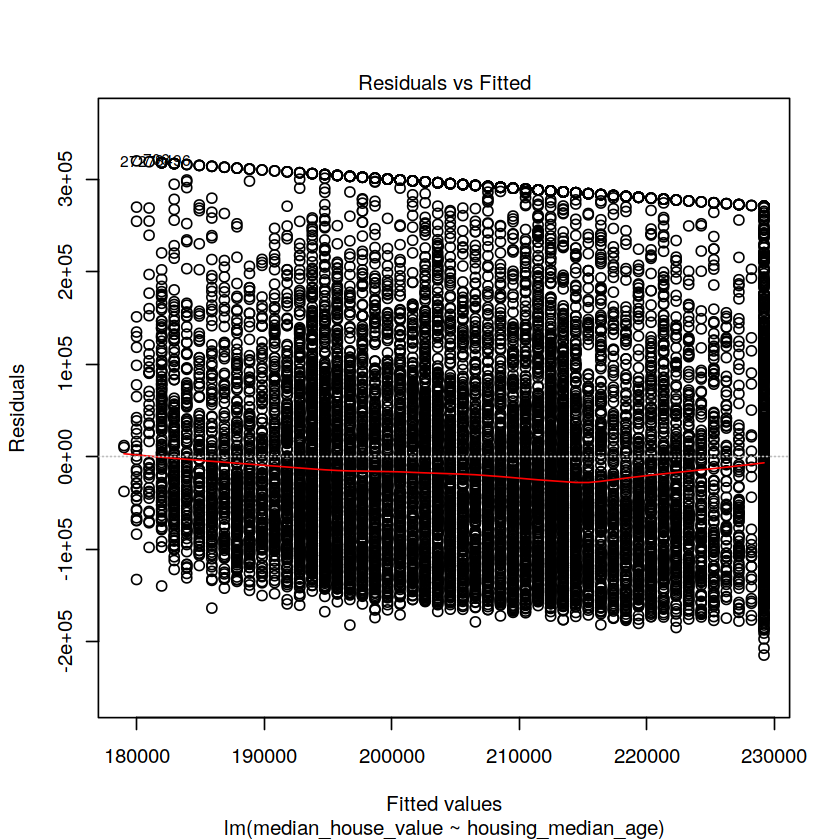

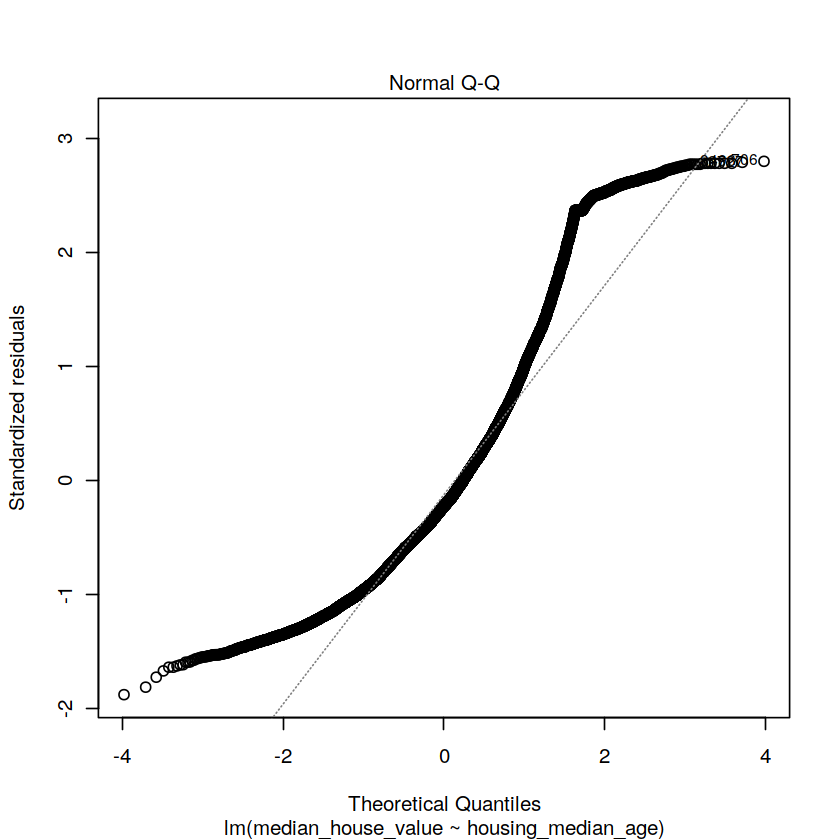

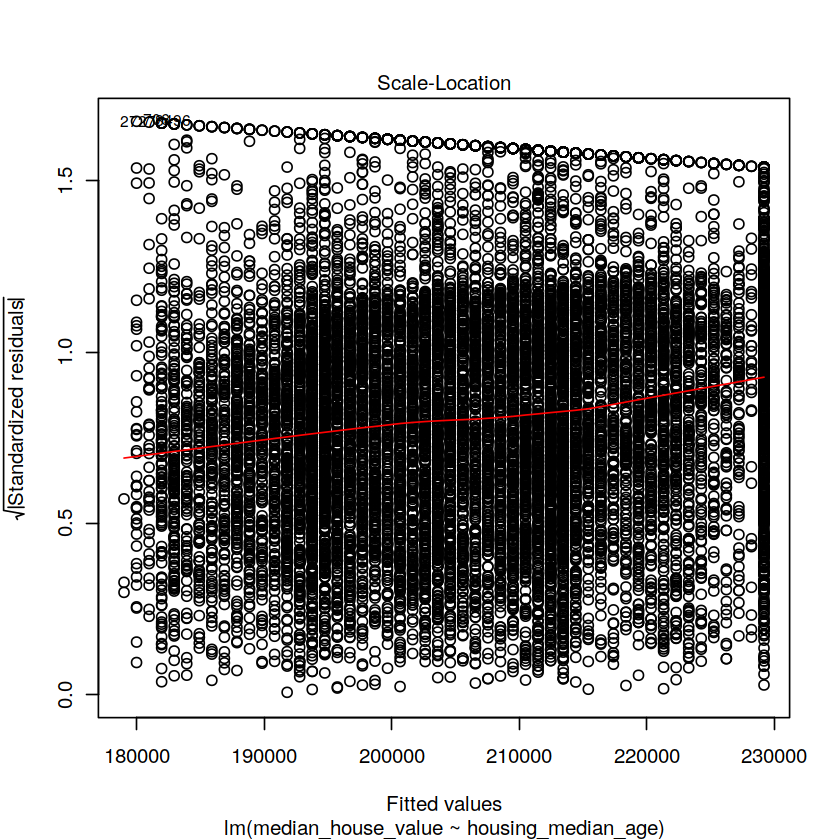

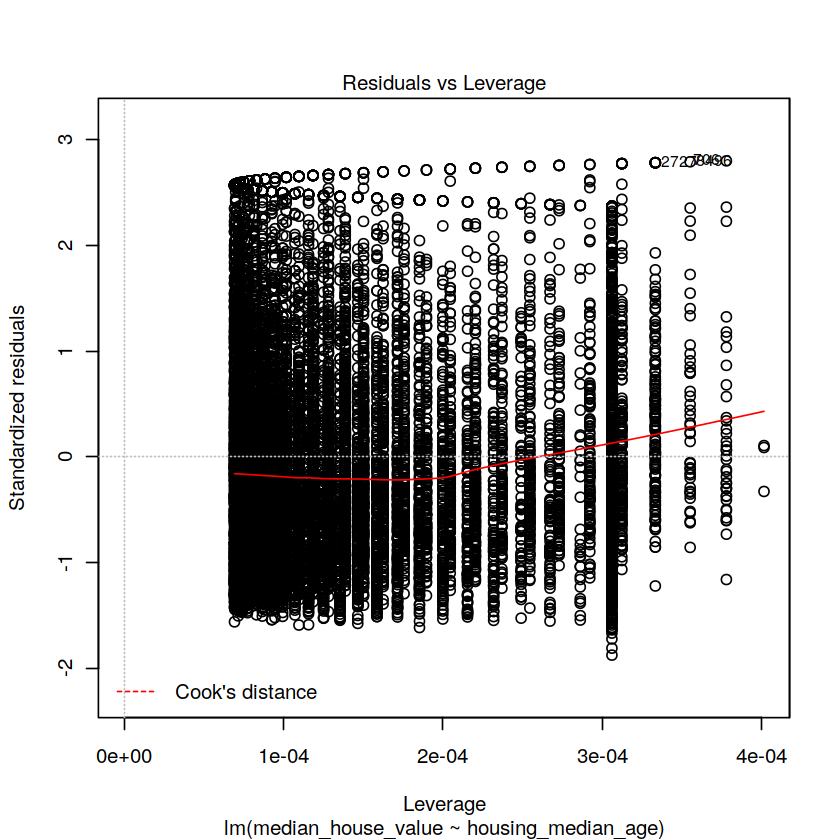

In [26]:
#plotting model to analyise residual plots

plot(model_simple_linear_reg)

### Lets  some predictions and EVALUATE THE MODEL

In [27]:
pred_slr = predict(model_simple_linear_reg , data_test)


In [28]:
d = data_test$median_house_value-pred_slr
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((data_test$median_house_value-mean(data_test$median_house_value))^2))

cat("Evaluation Metrics of SLR model ","\n",
    "MAE:", mae, "\n", 
    "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", 
    "R-squared:", R2)

Evaluation Metrics of SLR model  
 MAE: 91440.32 
 MSE: 13440028266 
 RMSE: 115931.1 
 R-squared: 0.009521423

## Lets try different variable for the SLR model now  (SLR Model No 2)


In [29]:
model_simple_linear_reg_2 = lm(median_house_value~median_income, data = data_train)

summary(model_simple_linear_reg_2)


Call:
lm(formula = median_house_value ~ median_income, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-459199  -54947  -16228   35827  435951 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    42969.4     1567.8   27.41   <2e-16 ***
median_income  42169.9      363.9  115.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82700 on 14438 degrees of freedom
Multiple R-squared:  0.4819,	Adjusted R-squared:  0.4819 
F-statistic: 1.343e+04 on 1 and 14438 DF,  p-value: < 2.2e-16


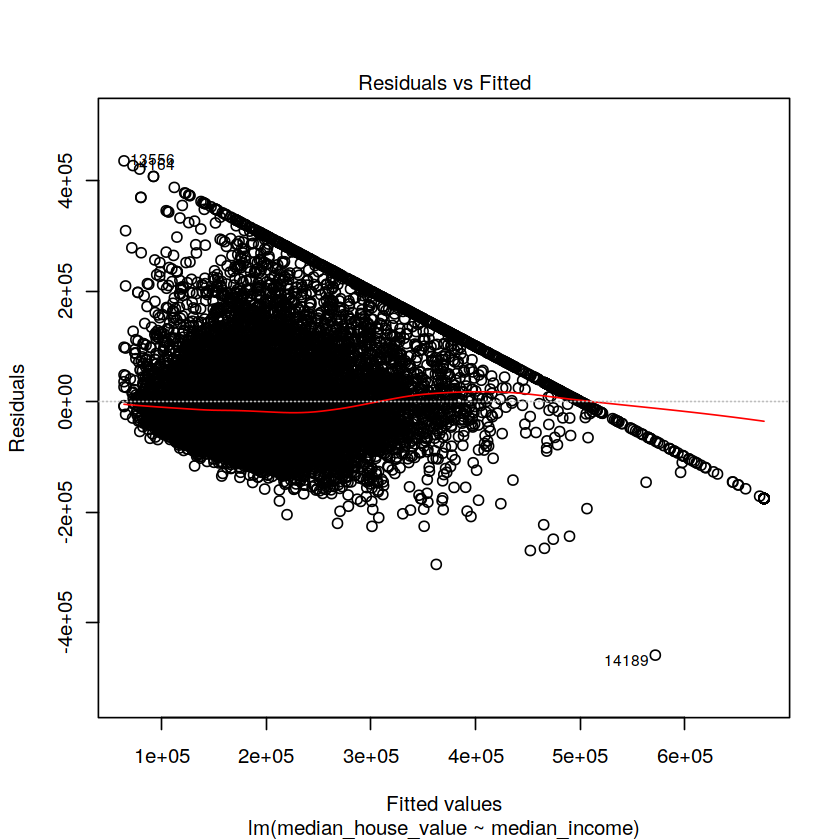

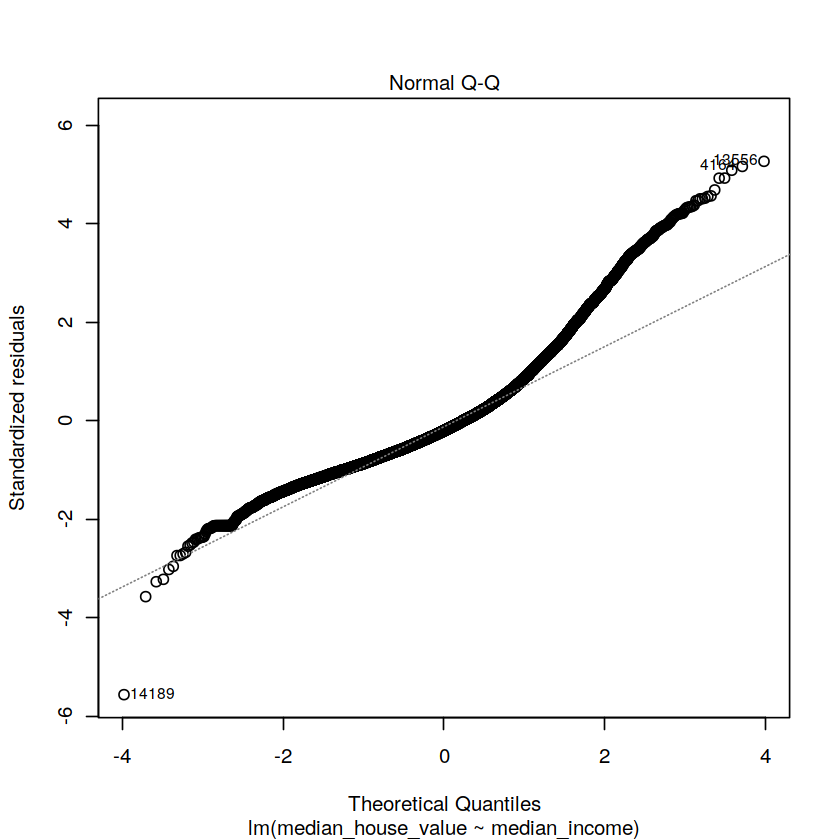

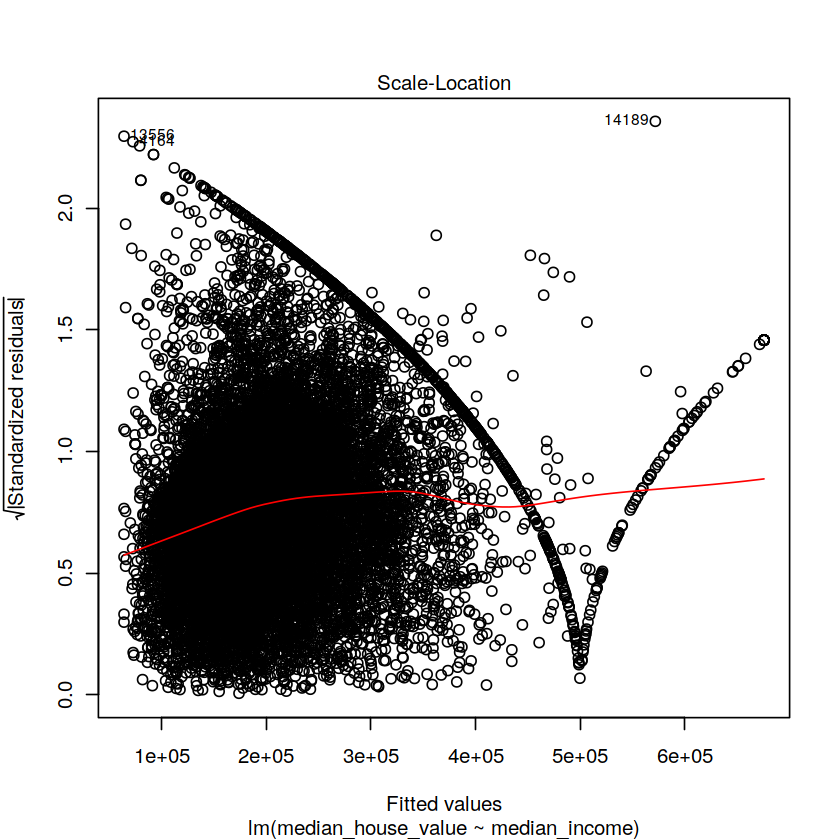

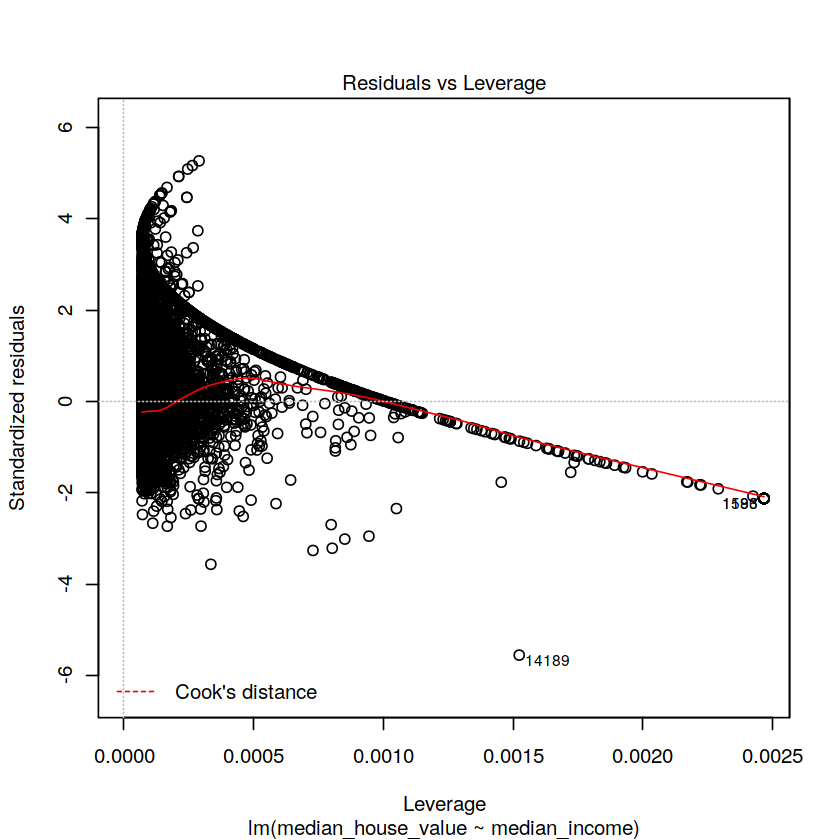

In [30]:
#plotting model to analyise residual plots

plot(model_simple_linear_reg_2)

### Evaluate the SLR model no - 2 

In [31]:
pred_slr = predict(model_simple_linear_reg_2 , data_test)


In [32]:
d = data_test$median_house_value-pred_slr
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((data_test$median_house_value-mean(data_test$median_house_value))^2))

cat("Evaluation Metrics of SLR model ","\n",
    "MAE:", mae, "\n", 
    "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", 
    "R-squared:", R2)

Evaluation Metrics of SLR model  
 MAE: 64243.14 
 MSE: 7383283775 
 RMSE: 85926.04 
 R-squared: 0.4558803

## Lets Make a Multiple Regression Model

In [33]:
#lets make a linear regression model on train data

model_multiple_linear_reg = lm(median_house_value~., data = data_train)

summary(model_multiple_linear_reg)


Call:
lm(formula = median_house_value ~ ., data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-437546  -43346  -10702   29947  618519 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -6.828e+04  2.591e+03 -26.352   <2e-16 ***
housing_median_age  1.400e+03  5.234e+01  26.757   <2e-16 ***
total_rooms        -1.299e+01  9.347e-01 -13.896   <2e-16 ***
total_bedrooms      6.087e+01  7.214e+00   8.438   <2e-16 ***
population         -3.132e+01  1.297e+00 -24.146   <2e-16 ***
households          1.155e+02  8.125e+00  14.215   <2e-16 ***
median_income       4.401e+04  3.919e+02 112.305   <2e-16 ***
ocean_proximity     2.568e+04  6.548e+02  39.217   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 71630 on 14432 degrees of freedom
Multiple R-squared:  0.6115,	Adjusted R-squared:  0.6113 
F-statistic:  3244 on 7 and 14432 DF,  p-value: < 2.2e-16


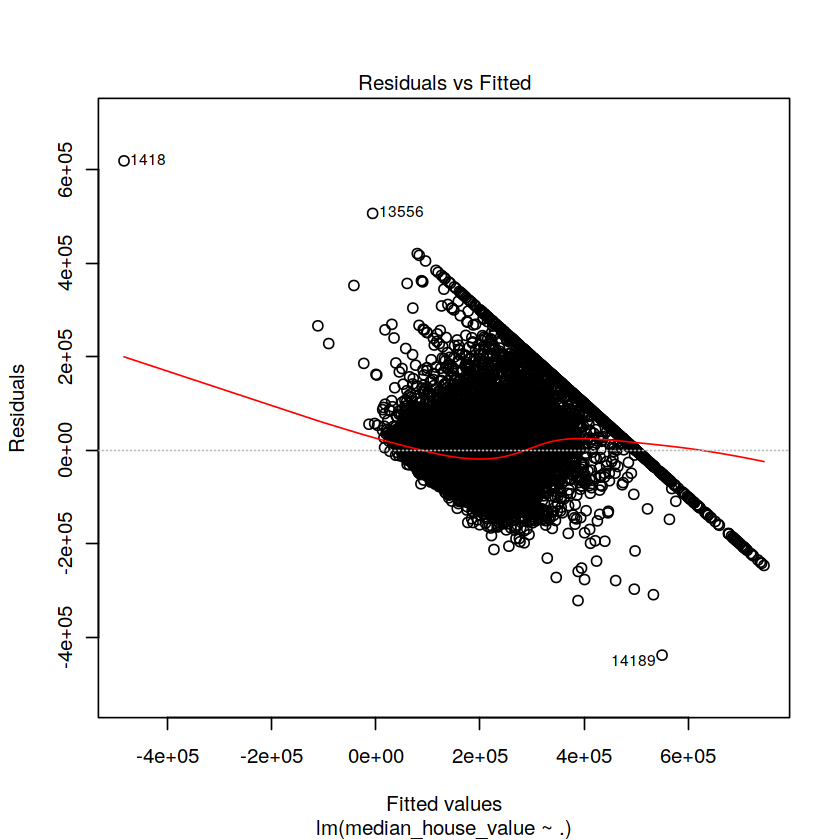

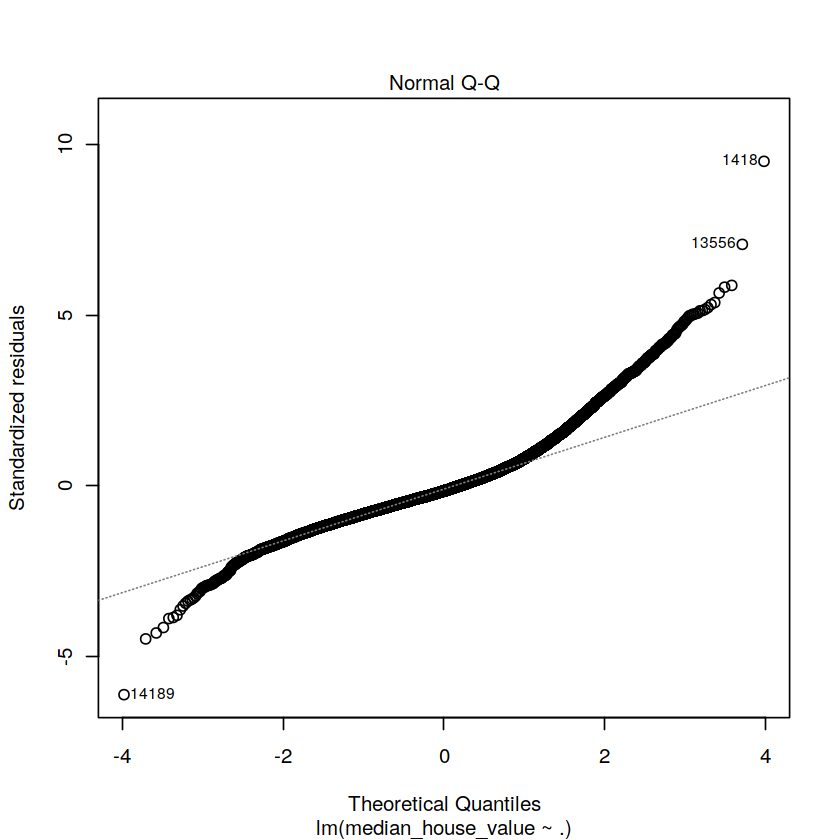

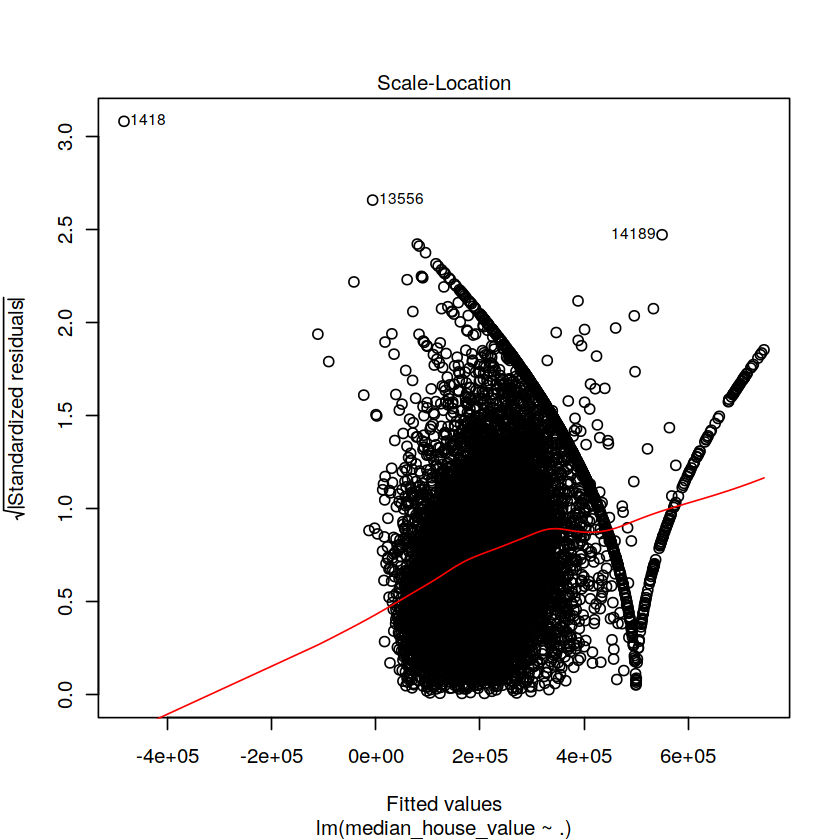

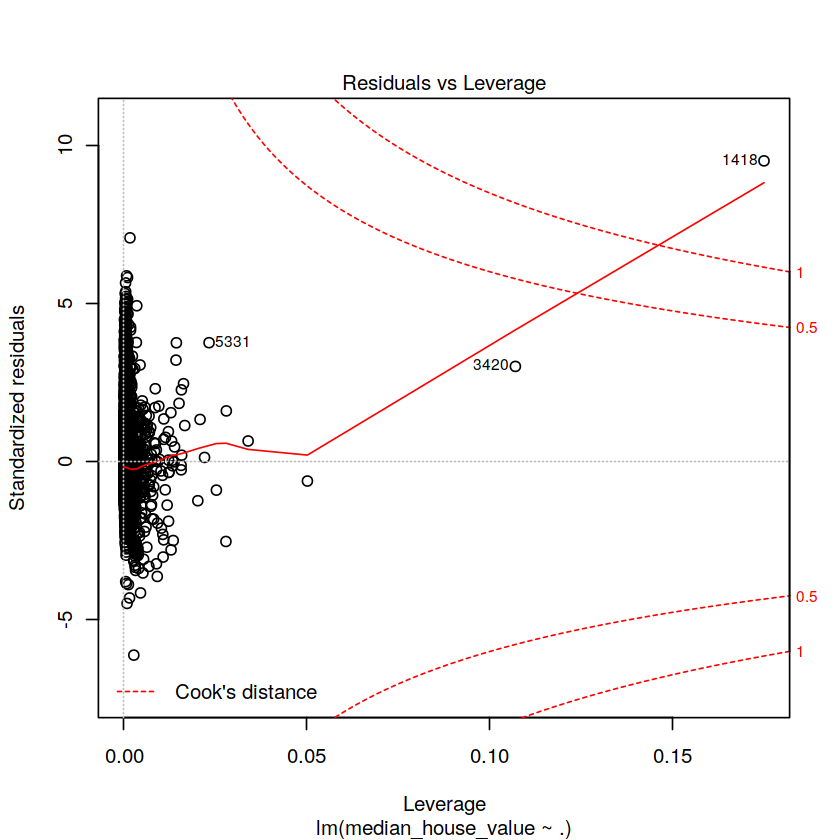

In [34]:
#plotting model to analyise residual plots

plot(model_multiple_linear_reg)

### Evalutaion metrics on MLR model

In [35]:
pred_mlr = predict(model_multiple_linear_reg , data_test)

In [36]:
d = data_test$median_house_value-pred_mlr
mse = mean((d)^2)
mae = mean(abs(d))
rmse = sqrt(mse)
R2 = 1-(sum((d)^2)/sum((data_test$median_house_value-mean(data_test$median_house_value))^2))

cat("Evaluation Metrics of MLR model ","\n",
    "MAE:", mae, "\n", 
    "MSE:", mse, "\n", 
    "RMSE:", rmse, "\n", 
    "R-squared:", R2)

Evaluation Metrics of MLR model  
 MAE: 53156.13 
 MSE: 5379206944 
 RMSE: 73343.08 
 R-squared: 0.6035731

# CONCLUSION

## From This we have learned how to perform diffenent kinds of correlation analysis as well as regression analysis on a dataset

# ------------- END OF ASSIGNMENT -------------